## Lesson outline :
* Basic : (35 mins)

    * import and explore data
    * data visualization
    * data manipulation
    * data cleaning & handling missing values
    
    
* ML process : (35 mins)

    * train/test split
    * train a model
    * test your model
    * cross validation
    * model selection
    * model tuning
    * feature engineering (not in this session)
    * test your production model
    
 
* HW guided tour (20 mins)


In [89]:
import pandas as pd
import sklearn.ensemble
import seaborn as sns
# allow plots to appear within the note
%matplotlib inline
import matplotlib.pyplot as plt

In [90]:
#load the data
titanic = pd.read_csv('titanic.csv', header=0)


In [91]:
#display the first 5 samples
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [92]:
#display the last 5 samples
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [93]:
#numeric values statistics
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [94]:
#data information
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### מה ניתן להסיק מהסתכלות על הנתונים ?

## Seaborn
##### note : you can also use matplotlib / pandas esc.

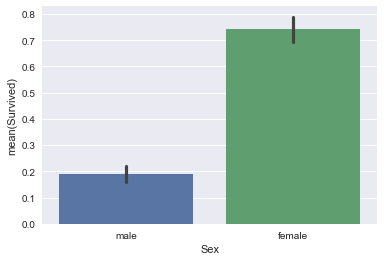

In [95]:
# in %
sns.barplot(x="Sex",y="Survived",data=titanic)

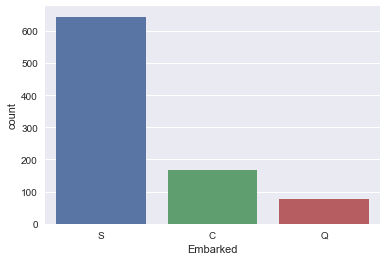

In [96]:
#count
sns.countplot(x="Embarked",data=titanic)

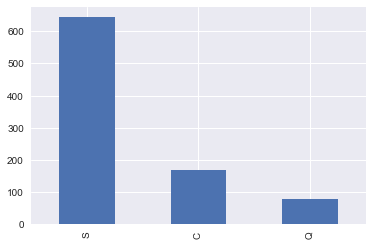

In [97]:
#alternative
titanic.Embarked.value_counts().plot('bar') #try also barh

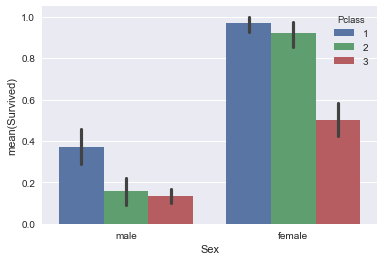

In [98]:
# use color as another dimention
sns.barplot(x="Sex",y="Survived",hue = "Pclass",data=titanic)

#### exercise : plot barplot to describe survival rate vs. Embarked & Sex

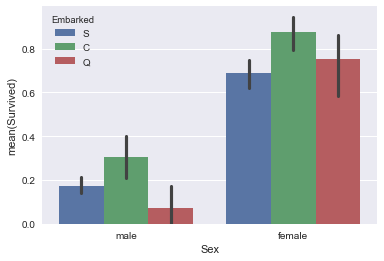

In [99]:
sns.barplot(x="Sex",y="Survived",hue = "Embarked",data=titanic)

### another useful functions :
df.corr() - Compute pairwise correlation of columns, excluding NA/null values

pd.crosstab(col1,col2) - computes a frequency table of two features

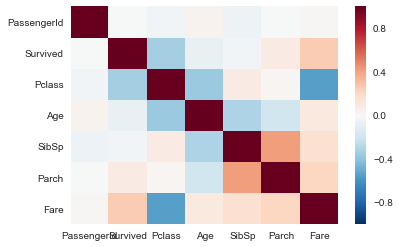

In [100]:
#fig = plt.figure()
#fig.set_size_inches(10,5)

sns.heatmap(titanic.corr())

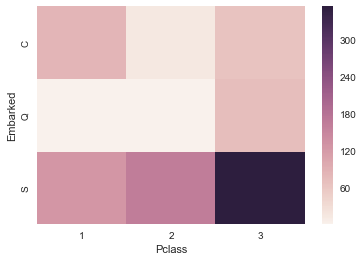

In [101]:
fig = plt.figure()
fig.set_size_inches(6,4)
sns.heatmap(pd.crosstab(titanic.Embarked,titanic.Pclass))

## Exercise 
* load the chicago crimes dataset
* take check statistics , info and look at the first 7 crimes
* plot the connection between crime types and location description

In [102]:
ch = pd.read_csv('ward42.csv')

In [103]:
ch.head(7)

,Unnamed: 0,Date,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Latitude,Longitude,Location
0,15,05/03/2016 05:30:00 PM,THEFT,CTA TRAIN,False,False,113,1.0,42.0,32.0,2016,41.878639,-87.627691,"(41.878638996, -87.627691486)"
1,16,05/03/2016 01:30:00 PM,THEFT,SIDEWALK,False,False,111,1.0,42.0,32.0,2016,41.884498,-87.625839,"(41.884497529, -87.625838595)"
2,69,05/03/2016 11:11:00 PM,BATTERY,SIDEWALK,True,True,1834,18.0,42.0,8.0,2016,41.893027,-87.626751,"(41.893026751, -87.626750829)"
3,82,05/03/2016 11:30:00 PM,OTHER OFFENSE,STREET,False,False,1831,18.0,42.0,8.0,2016,41.889934,-87.637619,"(41.889934493, -87.637619229)"
4,103,05/03/2016 05:30:00 PM,CRIMINAL DAMAGE,RESTAURANT,False,False,112,1.0,42.0,32.0,2016,41.881651,-87.626200,"(41.881651236, -87.626200491)"
5,109,05/03/2016 03:30:00 PM,DECEPTIVE PRACTICE,OTHER,False,False,1832,18.0,42.0,8.0,2016,41.897980,-87.630377,"(41.897980396, -87.630376682)"
6,111,05/03/2016 01:00:00 PM,THEFT,STREET,False,False,1834,18.0,42.0,8.0,2016,41.889453,-87.627995,"(41.889453169, -87.627994833)"


In [104]:
ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51012 entries, 0 to 51011
Data columns (total 14 columns):
Unnamed: 0              51012 non-null int64
Date                    51012 non-null object
Primary Type            51012 non-null object
Location Description    51012 non-null object
Arrest                  51012 non-null bool
Domestic                51012 non-null bool
Beat                    51012 non-null int64
District                51012 non-null float64
Ward                    51012 non-null float64
Community Area          51012 non-null float64
Year                    51012 non-null int64
Latitude                51012 non-null float64
Longitude               51012 non-null float64
Location                51012 non-null object
dtypes: bool(2), float64(5), int64(3), object(4)
memory usage: 4.8+ MB


In [105]:
ch.describe()

,Unnamed: 0,Beat,District,Ward,Community Area,Year,Latitude,Longitude
count,5.101200e+04,51012.000000,51012.000000,51012.0,51012.000000,51012.000000,51012.000000,51012.000000
mean,1.565149e+06,1078.881616,10.557947,42.0,18.561201,2014.517074,41.889785,-87.628092
std,4.928057e+05,847.168684,8.386958,0.0,11.798001,1.144207,0.033749,0.025977
min,1.500000e+01,111.000000,1.000000,42.0,8.000000,2013.000000,36.619446,-91.686566
25%,1.355450e+06,113.000000,1.000000,42.0,8.000000,2013.000000,41.883500,-87.631066
50%,1.643127e+06,1824.000000,18.000000,42.0,8.000000,2015.000000,41.890014,-87.627877
75%,1.914856e+06,1833.000000,18.000000,42.0,32.000000,2016.000000,41.895003,-87.624375
max,2.166268e+06,1834.000000,19.000000,42.0,32.000000,2016.000000,41.911195,-87.599327


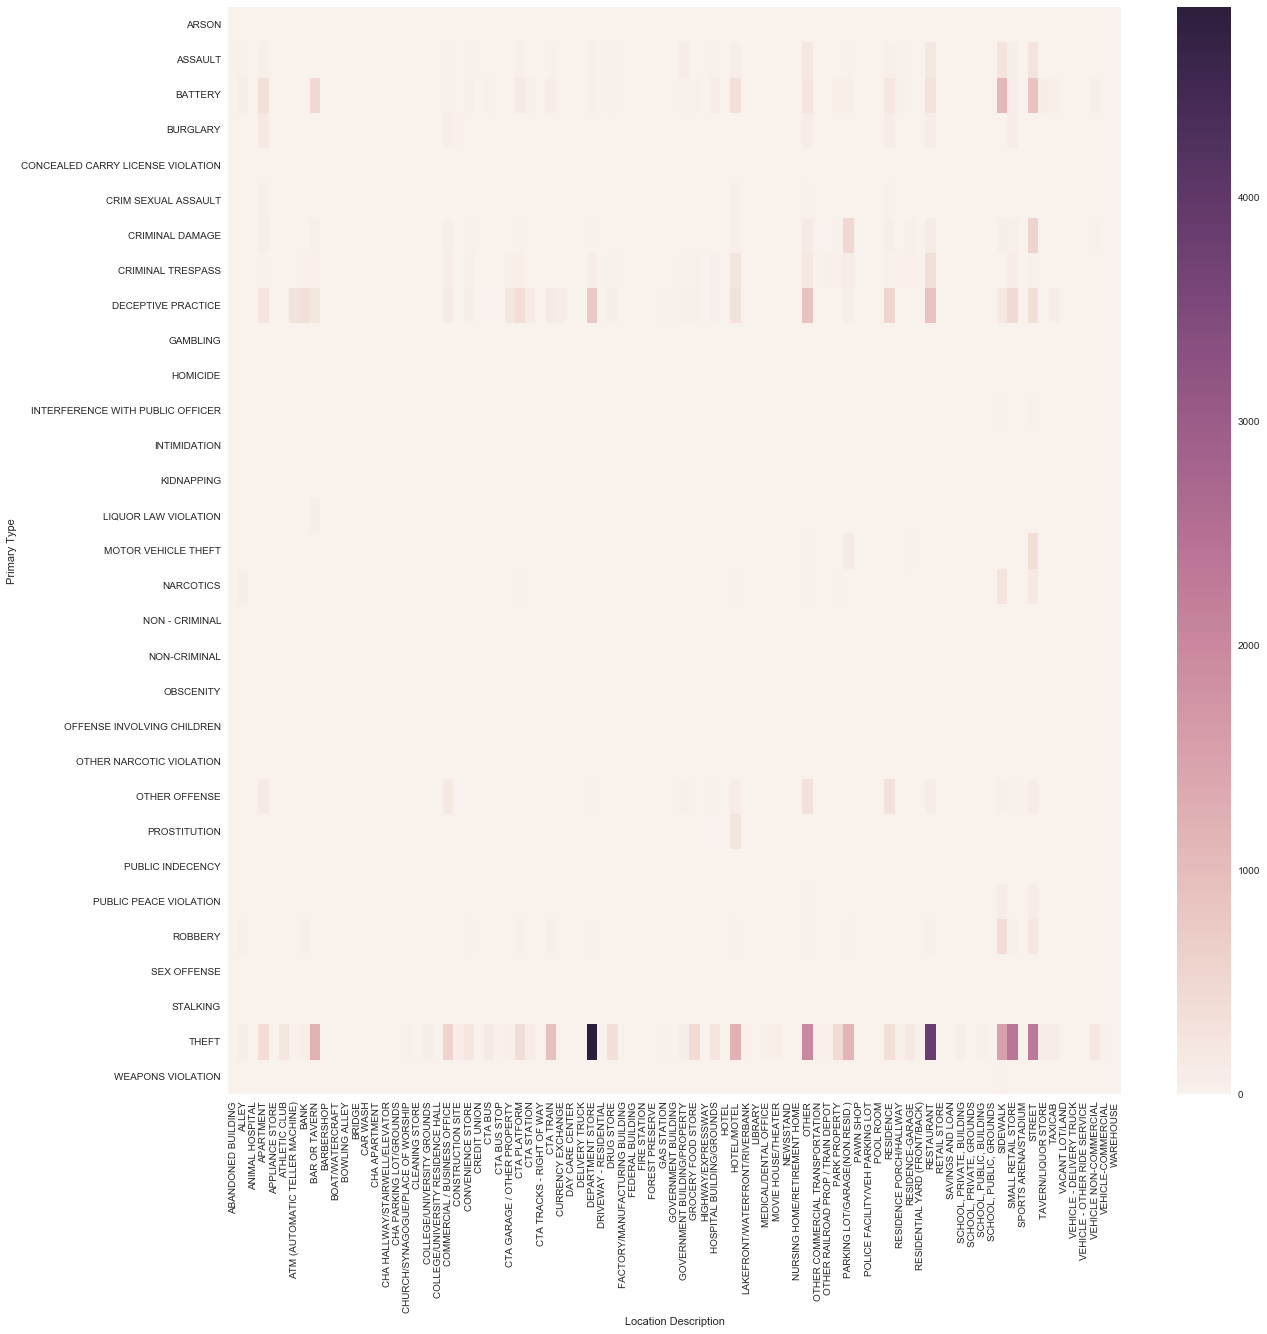

In [106]:
fig = plt.figure()
fig.set_size_inches(20,20)
sns.heatmap(pd.crosstab(ch['Primary Type'],ch['Location Description']))

## Data manipulation

In [107]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [108]:
titanic.drop(['Name'], axis=1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


why did the 'Name' columb stayed ?

In [109]:
titanic.drop?

In [110]:
titanic.drop(['Name'], axis=1 , inplace=True)
# alternative : titanic = titanic.drop(['Name'],axis=1)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


#### Exercise: Drop SibSp , Parch , Ticket , Fare , Cabin all together

In [111]:
titanic.drop(['SibSp','Parch','Ticket','Cabin'], axis=1 , inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,0,3,male,22.0,7.2500,S
1,2,1,1,female,38.0,71.2833,C
2,3,1,3,female,26.0,7.9250,S
3,4,1,1,female,35.0,53.1000,S
4,5,0,3,male,35.0,8.0500,S


### reminder
##### python function 

def func(a,b):

    return a+b
    
##### dictionary 

dic  = {'a':1 , 'b':2 , 'c':'OrenHazan'}




In [112]:
#option 1 :
def SetGender(sex):
    if sex=='male':
        return 1
    else:
        return 0
    
titanic['Gender1'] = titanic.Sex.apply(SetGender)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Gender1
0,1,0,3,male,22.0,7.2500,S,1
1,2,1,1,female,38.0,71.2833,C,0
2,3,1,3,female,26.0,7.9250,S,0
3,4,1,1,female,35.0,53.1000,S,0
4,5,0,3,male,35.0,8.0500,S,1


In [113]:
#option 2 :
titanic['Gender2'] = titanic.Sex.map({'male':1 , 'female':0})
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Gender1,Gender2
0,1,0,3,male,22.0,7.2500,S,1,1
1,2,1,1,female,38.0,71.2833,C,0,0
2,3,1,3,female,26.0,7.9250,S,0,0
3,4,1,1,female,35.0,53.1000,S,0,0
4,5,0,3,male,35.0,8.0500,S,1,1


### Exercise
* set Gender1 as Gender
* Embarked to Port
* drop Sex , Embarked , Gender1 , Gender2
* drop all missing values rows using dropna()

In [114]:
titanic = titanic.dropna()
titanic['Port'] = titanic.Embarked.map({'Q':2,'S':1 , 'C':0})
titanic['Gender'] = titanic.Gender1
titanic.drop(['Sex','Gender1','Gender2','Embarked'],axis=1, inplace=True)


In [115]:
titanic.head()

,PassengerId,Survived,Pclass,Age,Fare,Port,Gender
0,1,0,3,22.0,7.2500,1,1
1,2,1,1,38.0,71.2833,0,0
2,3,1,3,26.0,7.9250,1,0
3,4,1,1,35.0,53.1000,1,0
4,5,0,3,35.0,8.0500,1,1


In [116]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 7 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Age            712 non-null float64
Fare           712 non-null float64
Port           712 non-null int64
Gender         712 non-null int64
dtypes: float64(2), int64(5)
memory usage: 44.5 KB


# Part 2 : ML process

![flow](images\flow.png)

In [117]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(
    titanic,                # The dataset we want to split
    train_size=0.7,    # The proportional size of our training set
    stratify=titanic.Survived, # The labels are used for stratification
    random_state=40   # Use the same random state for reproducibility
)

In [118]:
#separate the target from the dataset
x_train = train.drop(['Survived'],axis=1)
y_train = train.Survived
x_test = test.drop(['Survived'],axis=1)
y_test = test.Survived

### General scikit learn modeling :
1. import your model
2. create an instance of your model (you can set up your parameters or use default)
3. train your model using fit() method on your <b>train</b> data
4. apply your model on the <b>test</b> data using predict() method for prediction
5. test your model on the y_test data using your measure of choise (accuarcy , MSE , AUC , log loss ...)



In [119]:
#step1
from sklearn.neighbors import KNeighborsClassifier

In [120]:
#step2
knn = KNeighborsClassifier(n_neighbors=3)

In [121]:
#step3
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [122]:
#step4
y_predicted = knn.predict(x_test)

In [123]:
#step5
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predicted)


0.66822429906542058

![cm](images\cm.jpg)

In [124]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predicted)

array([[99, 28],
       [43, 44]])

### Exercise : draw the confusion matrix

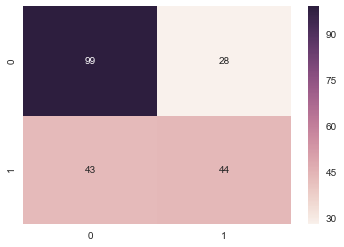

In [125]:
cm = confusion_matrix(y_test,y_predicted)
sns.heatmap(cm,annot=True)

In [ ]:
sns.heatmap?

#### go through the process using diffrent random seed

![shock](images\wait.gif)

### Cross validation

![cv](images\cv.jpg)

In [126]:
from sklearn.model_selection import cross_val_score
knn5 = KNeighborsClassifier()
cross_val_score(knn,x_train,y_train,n_jobs=-1,scoring='accuracy',cv=5)   #.mean()

array([ 0.57425743,  0.58      ,  0.56565657,  0.54545455,  0.60606061])

### Exercise :
* create a function that gets classifier,x_test,y_test,scoring,cv and  the mean score of cross_val_score
* Create 3 models with default parameters - KNeighborsClassifier , RandomForestClassifier , DecisionTreeClassifier
* apply the function on the 3 models using cv=5 & scoring='accuracy' and print the result
* try using diffrent parameters for the models and see if you can improve your score

In [127]:

def CalcKFoldAccuracy(classifier,X,Y,scoring,k):
    return cross_val_score(classifier, X, Y, cv=k, scoring=scoring).mean()

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
forest = RandomForestClassifier()
tree = DecisionTreeClassifier()

In [129]:
k=5
scoring ='accuracy'

print ('KNN : ')
print (CalcKFoldAccuracy(knn5,x_train,y_train,scoring,k))
print ('RF : ')
print (CalcKFoldAccuracy(forest,x_train,y_train,scoring,k))
print ('Tree : ')
print (CalcKFoldAccuracy(tree,x_train,y_train,scoring,k))

KNN : 
0.566204620462
RF : 
0.774922492249
Tree : 
0.724838483848


## Paremeter tuning


![rubik](images\rubik.gif)

In [130]:
from sklearn.model_selection import RandomizedSearchCV
n_trees = range(10,200)
max_features = ['sqrt','log2']
cores =-1
param_dict = dict(n_estimators=n_trees, max_features=max_features)
grid = RandomizedSearchCV(forest, param_dict, cv=5, scoring='accuracy')

In [131]:
grid.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': range(10, 200), 'max_features': ['sqrt', 'log2']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='accuracy', verbose=0)

In [132]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.789156626506
{'n_estimators': 118, 'max_features': 'sqrt'}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=118, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


### Finaly , test against the test_set

final score accuracy : 
0.841121495327


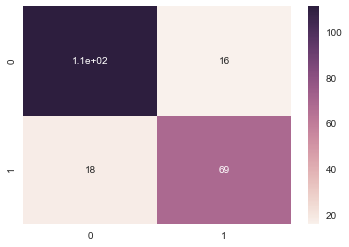

In [133]:

RF = RandomForestClassifier(n_estimators=grid.best_params_["n_estimators"],max_features =grid.best_params_["max_features"])
RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)
print ('final score accuracy : ')
print (accuracy_score(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

### Exercise : tune up DecisionTreeClassifier 
##### if time allows...


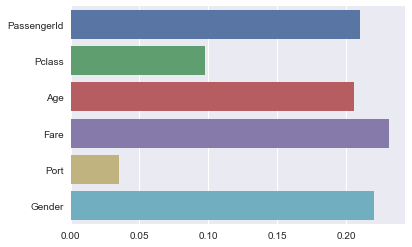

In [134]:
sns.barplot(y=x_test.columns,x=RF.feature_importances_,orient="h" )